[10.1, 13.9, 12.8, 10.4, 7.7, 8.6, 9.9, 11.6, 7.9, 9.9, 11.3, 10.5]
[1947.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0]


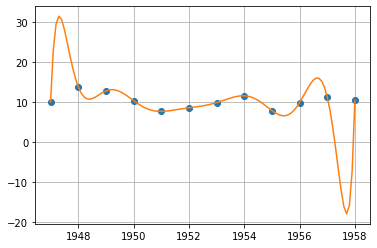

In [73]:
import numpy as np
import scipy.signal as ss
import matplotlib.pyplot as plt
data=np.loadtxt('24_Великий_Новгород.csv', dtype='float', delimiter=',',  skiprows=1)

temp=[]
year=[]
for n in range (112,124):
    fx=data[n][5]
    x=data[n][0]
    temp.append(fx)
    year.append(x)
print (temp)
print(year)
#Интерполяционный полином Лагранжа
def Ln(a,b,c):
    r=0 
    for j in range(0,12):
        p=1 
        for i in range(0,12):
            if j==i:
                p=p*1
            else:
                p=p*((c-year[i])/(year[j]-year[i]))
        r=r+temp[j]*p
    return r
x1=np.arange(np.min(year),np.max(year)+0.1,0.1)
y1=[Ln(year,temp,i) for i in x1]
plt.plot(year,temp,'o',x1,y1)
plt.grid(True)
plt.show()

In [75]:
import numpy as np
import scipy.signal as ss
import matplotlib.pyplot as plt
data=np.loadtxt('24_Великий_Новгород.csv', dtype='float', delimiter=',',  skiprows=1)
print(data)


[[ 1.835e+03  9.999e+02  9.999e+02 ... -7.600e+00 -1.890e+01  9.999e+02]
 [ 1.836e+03  9.999e+02 -9.400e+00 ... -6.300e+00 -9.800e+00  9.999e+02]
 [ 1.837e+03 -1.080e+01 -6.900e+00 ... -5.100e+00 -1.970e+01  2.800e+00]
 ...
 [ 2.017e+03 -5.500e+00 -4.000e+00 ...  1.100e+00 -4.000e-01  5.700e+00]
 [ 2.018e+03 -3.600e+00 -9.100e+00 ...  7.000e-01 -4.200e+00  6.100e+00]
 [ 2.019e+03 -6.900e+00 -8.000e-01 ...  9.999e+02  9.999e+02  9.999e+02]]


[10.1, 13.9, 12.8, 10.4, 7.7, 8.6]
[1947.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0]
[1, 0.0, -0.0, 0.0, -0.0, 0.0]
[1, 0.09999999999990905, -0.08999999999992724, 0.17099999999986992, -0.49589999999963835, 1.9340099999986347]
[1, 0.1999999999998181, -0.15999999999989087, 0.28799999999983267, -0.8063999999995839, 3.0643199999985655]
[1, 0.29999999999972715, -0.20999999999989086, 0.35699999999987175, -0.9638999999997512, 3.5664299999993423]
[1, 0.3999999999996362, -0.23999999999992724, 0.3839999999999709, -0.9984000000000641, 3.594240000000594]
[1, 0.49999999999954525, -0.25, 0.3750000000001137, -0.9375000000004547, 3.281250000002018]
[1, 0.5999999999994543, -0.24000000000010913, 0.33600000000028374, -0.8064000000008643, 2.741760000003379]
[1, 0.6999999999993634, -0.21000000000025465, 0.27300000000046476, -0.6279000000012428, 2.072070000004501]
[1, 0.7999999999992724, -0.16000000000043657, 0.1920000000006403, -0.42240000000154837, 1.3516800000052622]
[1, 0.8999999999991815, -0.09000000000

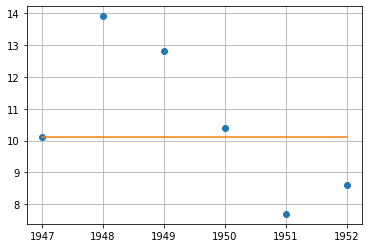

In [74]:
import numpy as np
import scipy.signal as ss
import matplotlib.pyplot as plt
data=np.loadtxt('24_Великий_Новгород.csv', dtype='float', delimiter=',',  skiprows=1)
temp=[]
year=[]
for n in range (112,118):
    fx=data[n][5]
    x=data[n][0]
    temp.append(fx)
    year.append(x)
print (temp)
print(year)
#Интерполяция первой формулой Ньютона
def N(x):
    h=0.1
    a = []
    a.insert(0,temp[0])
    a.insert(1, (temp[1] - a[0])/h)
    f=1
    for i in range(2,6):
        f = i * f
        a1 = (temp[i] - 2 * temp[i-1] + a[0])/ (f * (h**i))
        a.insert(i,a1)

    c =[]
    c.insert(0,1)
    cx=1
    for j in range (0,5):
        cx *= (x-year[j])
        c.insert(j+1,cx)
    print(c)
    p = []
    px=0
    for k in range (0,6):
        px = px + a[k] * c[k]
        p.insert(k,px)
        return p
x1=np.arange(np.min(year),np.max(year)+0.1,0.1)
y1=[N(d) for d in x1]
plt.plot(year,temp,'o',x1,y1)
plt.grid(True)
plt.show()

[10.1, 13.9, 12.8, 10.4, 7.7, 8.6]
[6. 5. 4. 3. 2. 1.]


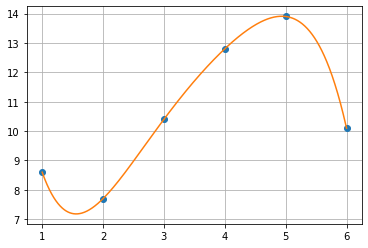

In [1]:
import numpy as np
import scipy.signal as ss
import matplotlib.pyplot as plt
data=np.loadtxt('24_Великий_Новгород.csv', dtype='float', delimiter=',',  skiprows=1)
from numpy import *
a = []
y = []
for i in range (112,118):
    if (data[i][5] == 999.9):
        continue
    y.append(data[i][5])
print(y)    
x = linspace(len(y),  1, len(y))
print(x)
#Интерполяция второй формулой Ньютона 
def N2(x1, y ,t):
    p = 1
    arr1 = copy(y)
    arr2 = copy(x1)
    a = arr1[::-1] 
    x = arr2[::-1]
    sum = a[0]
    for i in range (1, len (y)):
        for j in range(len (y)-1, i-1, -1):
            a[j] = (a[j]-a[j-1])/(x[j]-x[j-i])
    for i in range(1, len(x)):
        p*= (t - x[i-1])
        sum += a[i]*p
    return sum
coord_x = linspace(min(x), max(x), 1000)
coord_y = [N2(x, y, i) for i in coord_x]
plt.plot(x,y,'o', coord_x, coord_y)
plt.grid(True)
plt.show()

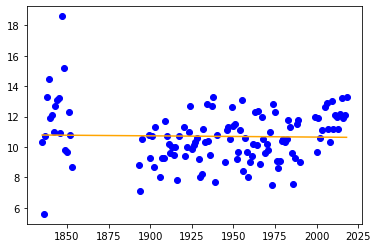

In [77]:
import numpy as np
import scipy.signal as ss
import matplotlib.pyplot as plt
import csv
data=np.loadtxt('24_Великий_Новгород.csv', dtype='float', delimiter=',',  skiprows=1)

year=[]
temp=[]
n=0
for i in range (185):
    if (data[i][9] == 999.9):
        continue
    year.append(int(data[i,0]))
    temp.append(float(data[i,9]))       
# Апроксимирующий полином
def apr(year, temp,const):
    #def sumx(year):
    sumx=0
    for i in range(len(year)):
        sumx+=(year[i])
    
    sumx1=0
    for i in range(len(temp)):
        sumx1+=(temp[i])
   
    sumy=0
    for i in range(len(year)):
            sumy+=( year[i]*year[i])
        
    sumy1=0
    for i in range(len(year)):
            sumy1+=( year[i]*temp[i])
       
   
    sumc=0
    for i in range(len(year)):
            sumc+=const
    X=[[sumy,sumx],[sumx,sumc]]
    Y=[sumy1,sumx1]
    c = np.linalg.solve(X, Y)
    a=c[0]
    b=c[1]
    X=np.arange(year[0], year[len(year)-1]+0.1, 0.1)    
    Y=np.array([a*x+b for x in X])
    return Y

X=np.arange(year[0], year[len(year)-1]+0.1, 0.1)  
Y=apr(year,temp,1)
plt.grid()
plt.plot(X,Y,'orange') 
plt.scatter(year,temp, color='blue')
plt.grid()
plt.show()